In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('new_data.csv')
df

,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE
0,2019-08-01,0,3.581,0.0,2,5.06,6,0,0.358,100.521
1,2019-09-03,0,3.517,0.0,2,5.06,3,0,0.270,100.406
2,2019-10-01,0,3.429,0.0,2,5.06,3,0,0.195,100.307
3,2019-11-01,0,3.435,0.0,2,5.06,3,0,0.111,100.172
4,2019-08-01,1,3.772,0.0,2,5.17,24,0,1.299,101.832
...,...,...,...,...,...,...,...,...,...,...
14013,2020-10-01,1138,5.748,1.7,2,6.00,300,1,4.981,101.262
14014,2020-11-02,1138,5.680,2.3,2,6.00,300,1,4.900,101.580
14015,2020-09-01,1139,5.866,3.3,2,5.70,300,1,5.211,99.113
14016,2020-10-01,1139,5.839,2.7,2,5.70,300,1,5.286,99.259


### Add seasonal indicator using month 

In [3]:
df['MONTH'] = pd.DatetimeIndex(df['VALUE DATE']).month
df

,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE,MONTH
0,2019-08-01,0,3.581,0.0,2,5.06,6,0,0.358,100.521,8
1,2019-09-03,0,3.517,0.0,2,5.06,3,0,0.270,100.406,9
2,2019-10-01,0,3.429,0.0,2,5.06,3,0,0.195,100.307,10
3,2019-11-01,0,3.435,0.0,2,5.06,3,0,0.111,100.172,11
4,2019-08-01,1,3.772,0.0,2,5.17,24,0,1.299,101.832,8
...,...,...,...,...,...,...,...,...,...,...,...
14013,2020-10-01,1138,5.748,1.7,2,6.00,300,1,4.981,101.262,10
14014,2020-11-02,1138,5.680,2.3,2,6.00,300,1,4.900,101.580,11
14015,2020-09-01,1139,5.866,3.3,2,5.70,300,1,5.211,99.113,9
14016,2020-10-01,1139,5.839,2.7,2,5.70,300,1,5.286,99.259,10


In [4]:
df = df.sort_values(['ID','VALUE DATE'])

### Add time series data for price

In [5]:
df_new = pd.DataFrame()

for index in set(df['ID']): 
    df_testing  = df.loc[df['ID']==index,:]
    df_testing['PRICE_1'] = df_testing['EVAL MID PRICE'].shift(1)
    df_testing['PRICE_2'] = df_testing['PRICE_1'].shift(1)
    df_testing['PRICE_3'] = df_testing['PRICE_2'].shift(1)
    df_testing['PRICE_4'] = df_testing['PRICE_3'].shift(1)
    df_testing['PRICE_5'] = df_testing['PRICE_4'].shift(1)
    df_testing['PRICE_6'] = df_testing['PRICE_5'].shift(1)
    df_new = pd.concat([df_new,df_testing],axis=0)

C:\Users\jowen\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jowen\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jowen\anaconda3\envs\keras_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [6]:
df_new.shape

(14018, 17)

In [7]:
import matplotlib.pyplot as plt

In [8]:
df_show= df_new[df_new['ID']==4]
df_show.shape

(15, 17)

### showing one of the time series trend

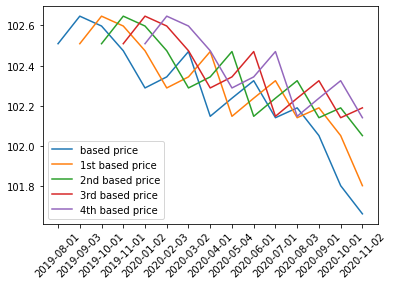

In [9]:
plt.plot(df_show['VALUE DATE'], df_show['EVAL MID PRICE'], label='based price');
plt.plot(df_show['VALUE DATE'], df_show['PRICE_1'], label='1st based price');
plt.plot(df_show['VALUE DATE'], df_show['PRICE_2'], label='2nd based price');
plt.plot(df_show['VALUE DATE'], df_show['PRICE_3'], label='3rd based price');
plt.plot(df_show['VALUE DATE'], df_show['PRICE_4'], label='4th based price');
plt.xticks(rotation=45)
plt.legend()
plt.show()

### create output column

In [10]:
def series_to_supervise(df_new, s=1):
    shifted_df = df_new.shift(s)
    shifted_df.rename(columns= {'EVAL MID PRICE':'OUTPUT PRICE'}, inplace=True)
    y_out = shifted_df['OUTPUT PRICE']
    del shifted_df
    
    return pd.concat([df_new, y_out], axis=1)

In [11]:
grouped = df_new.groupby(['ID'])
grouped

In [12]:
final_data = []
for name, data in grouped:
    data_sup = series_to_supervise(data)
    data_sup.dropna(subset=['OUTPUT PRICE'], inplace=True)
    final_data.append(data_sup)

In [13]:
df_sup = pd.concat(final_data)
print(df_sup.shape)
df_sup.head(10)

(12878, 18)


,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE,MONTH,PRICE_1,PRICE_2,PRICE_3,PRICE_4,PRICE_5,PRICE_6,OUTPUT PRICE
1,2019-09-03,0,3.517,0.0,2,5.06,3,0,0.270,100.406,9,100.521,NaN,NaN,NaN,NaN,NaN,100.521
2,2019-10-01,0,3.429,0.0,2,5.06,3,0,0.195,100.307,10,100.406,100.521,NaN,NaN,NaN,NaN,100.406
3,2019-11-01,0,3.435,0.0,2,5.06,3,0,0.111,100.172,11,100.307,100.406,100.521,NaN,NaN,NaN,100.307
5,2019-09-03,1,3.650,0.0,2,5.17,24,0,1.211,101.864,9,101.832,NaN,NaN,NaN,NaN,NaN,101.832
6,2019-10-01,1,3.587,0.0,2,5.17,24,0,1.136,101.827,10,101.864,101.832,NaN,NaN,NaN,NaN,101.864
7,2019-11-01,1,3.599,0.0,2,5.17,24,0,1.052,101.688,11,101.827,101.864,101.832,NaN,NaN,NaN,101.827
8,2020-01-02,1,3.526,0.0,2,5.17,12,0,0.911,101.504,1,101.688,101.827,101.864,101.832,NaN,NaN,101.688
9,2020-02-03,1,3.375,3.0,2,5.17,12,0,0.826,101.491,2,101.504,101.688,101.827,101.864,101.832,NaN,101.504
10,2020-03-02,1,3.179,2.7,2,5.17,12,0,0.751,101.508,3,101.491,101.504,101.688,101.827,101.864,101.832,101.491
11,2020-04-01,1,3.237,2.7,2,5.17,12,0,0.670,101.310,4,101.508,101.491,101.504,101.688,101.827,101.864,101.508


In [14]:
df_sup[df_sup['ID']==2]

,VALUE DATE,ID,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE,MONTH,PRICE_1,PRICE_2,PRICE_3,PRICE_4,PRICE_5,PRICE_6,OUTPUT PRICE
20,2019-09-03,2,3.587,0.0,2,5.12,12,0,0.747,101.152,9,101.203,NaN,NaN,NaN,NaN,NaN,101.203
21,2019-10-01,2,3.509,0.0,2,5.12,12,0,0.672,101.093,10,101.152,101.203,NaN,NaN,NaN,NaN,101.152
22,2019-11-01,2,3.541,0.0,2,5.12,12,0,0.588,100.942,11,101.093,101.152,101.203,NaN,NaN,NaN,101.093
23,2020-01-02,2,3.460,0.0,2,5.12,6,0,0.436,100.719,1,100.942,101.093,101.152,101.203,NaN,NaN,100.942
24,2020-02-03,2,3.313,0.0,2,5.12,6,0,0.351,100.625,2,100.719,100.942,101.093,101.152,101.203,NaN,100.719
25,2020-03-02,2,3.114,0.0,2,5.12,3,0,0.276,100.543,3,100.625,100.719,100.942,101.093,101.152,101.203,100.625
26,2020-04-01,2,3.097,0.0,2,5.12,3,0,0.195,100.385,4,100.543,100.625,100.719,100.942,101.093,101.152,100.543
27,2020-05-04,2,2.940,0.0,2,5.12,3,0,0.105,100.223,5,100.385,100.543,100.625,100.719,100.942,101.093,100.385
28,2020-06-01,2,2.687,0.0,2,5.12,3,0,0.029,100.068,6,100.223,100.385,100.543,100.625,100.719,100.942,100.223


In [22]:
df_sup.drop('ID', axis=1, inplace=True)
df_sup.drop('VALUE DATE',axis=1,inplace=True)

In [16]:
df_sup.fillna(0,inplace=True)

In [23]:
df_sup

,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,CALLABLE/PUTTABLE,MODIFIED DURATION,EVAL MID PRICE,MONTH,PRICE_1,PRICE_2,PRICE_3,PRICE_4,PRICE_5,PRICE_6,OUTPUT PRICE
1,3.517,0.0,2,5.06,3,0,0.270,100.406,9,100.521,0.000,0.000,0.0,0.0,0.0,100.521
2,3.429,0.0,2,5.06,3,0,0.195,100.307,10,100.406,100.521,0.000,0.0,0.0,0.0,100.406
3,3.435,0.0,2,5.06,3,0,0.111,100.172,11,100.307,100.406,100.521,0.0,0.0,0.0,100.307
5,3.650,0.0,2,5.17,24,0,1.211,101.864,9,101.832,0.000,0.000,0.0,0.0,0.0,101.832
6,3.587,0.0,2,5.17,24,0,1.136,101.827,10,101.864,101.832,0.000,0.0,0.0,0.0,101.864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,5.332,1.7,2,5.80,300,1,3.440,101.623,11,101.403,101.355,0.000,0.0,0.0,0.0,101.403
14013,5.748,1.7,2,6.00,300,1,4.981,101.262,10,101.128,0.000,0.000,0.0,0.0,0.0,101.128
14014,5.680,2.3,2,6.00,300,1,4.900,101.580,11,101.262,101.128,0.000,0.0,0.0,0.0,101.262
14016,5.839,2.7,2,5.70,300,1,5.286,99.259,10,99.113,0.000,0.000,0.0,0.0,0.0,99.113


In [24]:
from sklearn.preprocessing import MinMaxScaler

#### confirm every features are in int/float 

In [25]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12878 entries, 1 to 14017
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EVAL MID YIELD                   12878 non-null  float64
 1   COMPOSITE LIQUIDITY SCORE (T-1)  12878 non-null  float64
 2   COUPON FREQUENCY                 12878 non-null  int64  
 3   NEXT COUPON RATE                 12878 non-null  float64
 4   REMAINING_TENURE_INT             12878 non-null  int64  
 5   CALLABLE/PUTTABLE                12878 non-null  int64  
 6   MODIFIED DURATION                12878 non-null  float64
 7   EVAL MID PRICE                   12878 non-null  float64
 8   MONTH                            12878 non-null  int64  
 9   PRICE_1                          12878 non-null  float64
 10  PRICE_2                          12878 non-null  float64
 11  PRICE_3                          12878 non-null  float64
 12  PRICE_4           

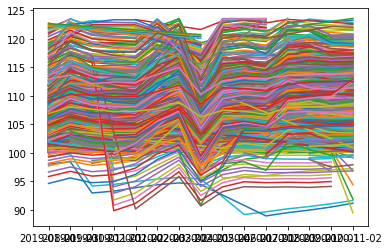

Text(0, 0.5, 'Bond Price')

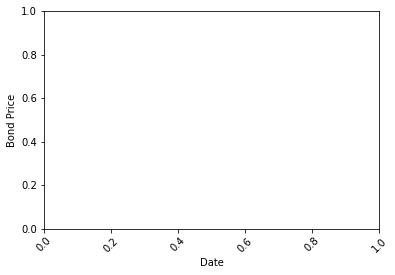

In [26]:
for index in set(df_new['ID']):
    df_show= df_new[df_new['ID']==index]
    plt.plot(df_show['VALUE DATE'], df_show['EVAL MID PRICE'], label='based price');
plt.show()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Bond Price')

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(df)

data = scaler.fit_transform(df_sup)

data.shape

(12878, 16)

In [28]:
x = data[:, :-1] # every row of all column except last column
y = data[:, -1] # every row of last column

In [29]:
train_x, test_x = x[:10000, :], x[10000:, :]
train_y, test_y = y[:10000], y[10000:]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(10000, 1, 15) (10000,) (2878, 1, 15) (2878,)


## Model Building

In [ ]:
# not sure if you need to install coz i installed it previously

In [30]:
import h5py

In [31]:
import tensorflow

In [32]:
from tensorflow.keras.layers import Dense,LSTM, Activation
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(32, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [34]:
model.fit(train_x, train_y,epochs=10, batch_size=32, validation_data=(test_x, test_y), verbose=1, shuffle=False)

Train on 10000 samples, validate on 2878 samples
Epoch 1/10
10000/10000 [==============================] - 2s 225us/sample - loss: 0.0692 - val_loss: 0.0882
Epoch 2/10
10000/10000 [==============================] - 1s 65us/sample - loss: 0.0395 - val_loss: 0.0609
Epoch 3/10
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0303 - val_loss: 0.0392
Epoch 4/10
10000/10000 [==============================] - 1s 71us/sample - loss: 0.0180 - val_loss: 0.0252
Epoch 5/10
10000/10000 [==============================] - 1s 68us/sample - loss: 0.0134 - val_loss: 0.0187
Epoch 6/10
10000/10000 [==============================] - 1s 59us/sample - loss: 0.0091 - val_loss: 0.0150
Epoch 7/10
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0073 - val_loss: 0.0222
Epoch 8/10
10000/10000 [==============================] - 1s 63us/sample - loss: 0.0085 - val_loss: 0.0123
Epoch 9/10
10000/10000 [==============================] - 1s 71us/sample - loss: 0.0075 - val_

In [35]:
from math import sqrt 
from sklearn.metrics import mean_squared_error

preds = model.predict(test_x)

test_X = test_x.reshape((test_x.shape[0], test_x.shape[2]))
print(test_X.shape)
# invert scaling for forecast
inv_yhat = np.concatenate((test_X[:, :], preds), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, :], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse =sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(2878, 15)
(2878, 16)
Test RMSE: 0.911


## Prediction on other data

In [36]:
test_data = test_x[0:5,:,:]
test_truth = test_y[0:5]

In [38]:
test_data.shape

(5, 1, 15)

In [39]:
test_truth

array([[0.58783706],
       [0.57945379],
       [0.56634593],
       [0.54396174],
       [0.53318737]])

In [40]:
pred = model.predict(test_data)

test_X = test_data.reshape((test_data.shape[0], test_data.shape[2]))
print(test_X.shape)
# invert scaling for forecast
inv_yhat = np.concatenate((test_X[:, :], pred), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_truth = test_truth.reshape((len(test_truth), 1))
inv_y = np.concatenate((test_X[:, :], test_truth), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

(5, 15)
(5, 16)


In [41]:
dataframe = pd.DataFrame({'Predicted trade price': inv_yhat, 'Real trade price': inv_y})
dataframe

,Predicted trade price,Real trade price
0,109.596581,109.305
1,109.073112,109.014
2,108.643661,108.559
3,107.918625,107.782
4,107.608712,107.408
